## **Rock Paper Scissor Image Classifier**
### **By: Gabrielle Felicia Ariyanto**

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

### **Load the Data**

In [3]:
import pandas as pd
import zipfile
import gdown
import os
import zipfile
import random

file_id = '14ibslTcioci7TwV8D50N3UAHbBNQR5ty'
file_url = f'https://drive.google.com/uc?id={file_id}'
zipfile_path = 'rockpaperscissors.zip'
#download file through google drive link (zip)
gdown.download(file_url, zipfile_path, quiet=False)

# extract file
with zipfile.ZipFile(zipfile_path,'r') as z:
  z.extractall()

Downloading...
From: https://drive.google.com/uc?id=14ibslTcioci7TwV8D50N3UAHbBNQR5ty
To: /content/rockpaperscissors.zip
100%|██████████| 321M/321M [00:02<00:00, 141MB/s] 


### **Fetch & separate training data and validation data for Rock image data**

In [4]:
rock_val_dir = './rockpaperscissors/val/rock'
rock_train_dir = './rockpaperscissors/train/rock'
os.makedirs(rock_train_dir, exist_ok = True)
os.makedirs(rock_val_dir, exist_ok = True)

current_dir = './rockpaperscissors/rock'
filenames = [f for f in os.listdir(current_dir) if os.path.isfile(os.path.join(current_dir,f))]
numfiles = len(filenames)

threshold = int(numfiles*0.4)

random.shuffle(filenames)
for i, filename in enumerate(filenames):
  if i<threshold:
    os.rename(os.path.join(current_dir, filename), os.path.join(rock_val_dir, filename))
  else:
    os.rename(os.path.join(current_dir, filename), os.path.join(rock_train_dir, filename))

print("number of rock val images:", len(os.listdir(rock_val_dir)))
print("number of rock train images:", len(os.listdir(rock_train_dir)))

number of rock val images: 290
number of rock train images: 436


### **Fetch & separate training data and validation data for Paper image data**

In [5]:
paper_val_dir = './rockpaperscissors/val/paper'
paper_train_dir = './rockpaperscissors/train/paper'
os.makedirs(paper_train_dir, exist_ok = True)
os.makedirs(paper_val_dir, exist_ok = True)

current_dir = './rockpaperscissors/paper'
filenames = [f for f in os.listdir(current_dir) if os.path.isfile(os.path.join(current_dir,f))]
numfiles = len(filenames)

threshold = int(numfiles*0.4)

print(numfiles, threshold)
random.shuffle(filenames)
for i, filename in enumerate(filenames):
  if i<threshold:
    os.rename(os.path.join(current_dir, filename), os.path.join(paper_val_dir, filename))
  else:
    os.rename(os.path.join(current_dir, filename), os.path.join(paper_train_dir, filename))

print("number of paper val images:", len(os.listdir(paper_val_dir)))
print("number of paper train images:", len(os.listdir(paper_train_dir)))

712 284
number of paper val images: 284
number of paper train images: 428


### **Fetch & separate training data and validation data for Scissors image data**

In [6]:
scissors_val_dir = './rockpaperscissors/val/scissors'
scissors_train_dir = './rockpaperscissors/train/scissors'
os.makedirs(scissors_train_dir, exist_ok = True)
os.makedirs(scissors_val_dir, exist_ok = True)

current_dir = './rockpaperscissors/scissors'
filenames = [f for f in os.listdir(current_dir) if os.path.isfile(os.path.join(current_dir,f))]
numfiles = len(filenames)

threshold = int(numfiles*0.4)

print(numfiles, threshold)
random.shuffle(filenames)
for i, filename in enumerate(filenames):
  if i<threshold:
    os.rename(os.path.join(current_dir, filename), os.path.join(scissors_val_dir, filename))
  else:
    os.rename(os.path.join(current_dir, filename), os.path.join(scissors_train_dir, filename))

print("number of scissors val images:", len(os.listdir(scissors_val_dir)))
print("number of scissors train images:", len(os.listdir(scissors_train_dir)))

750 300
number of scissors val images: 300
number of scissors train images: 450


### **Data Augmentation**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./255, rotation_range=20, horizontal_flip=True,shear_range = 0.2, vertical_flip=True, fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale= 1./255, rotation_range=20, horizontal_flip=True,shear_range = 0.2, vertical_flip=True, fill_mode = 'nearest')

validation_dir = './rockpaperscissors/val'
train_dir = './rockpaperscissors/train'

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(300,200),batch_size=32, class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(validation_dir, target_size=(300,200),batch_size=32, class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


### **Glance at the dataset's current class-specific numerical indexes.**

In [8]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

### **Build the Model with Neural Network**

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 99, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 97, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 23, 64)        0

**Explanation of the above model architecture:**

1. The input layer is sized at 300x200x3 (images of 300x200 dimensions with 3 color channels representing RGB).
2. Convolutional layer 1 uses a 3x3 kernel, 32 filters, and employs the ReLU activation function.
3. MaxPooling 2D layer with a pooling size of 2x2.
4. Convolutional layer 2 uses a 3x3 kernel, 64 filters, and employs the ReLU activation function.
5. MaxPooling 2D layer with a pooling size of 2x2.
6. Convolutional layer 3 uses a 3x3 kernel, 64 filters, and employs the ReLU activation function.
7. MaxPooling 2D layer with a pooling size of 2x2.
8. Convolutional layer 4 uses a 3x3 kernel, 128 filters, and employs the ReLU activation function.
9. MaxPooling 2D layer with a pooling size of 2x2.
10. Transition to a 1-dimensional representation using the flatten function.
11. Enter a fully connected layer 1 with 4096 nodes and the ReLU activation function.
12. Enter a fully connected layer 2 with 2048 nodes and the ReLU activation function.
13. Lastly, proceed to the output layer with 3 nodes, utilizing the softmax activation function for the classification of rock-paper-scissors images

### **Train the Model**

Next, train the model that has been made with training data and validation data using a number of epochs of 28

In [10]:
NUM_EPOCHS = 28
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size,
    verbose=1,
)

Epoch 1/28
41/41 [==============================] - 67s 1s/step - loss: 1.0970 - categorical_accuracy: 0.3495 - val_loss: 1.0955 - val_categorical_accuracy: 0.3229
Epoch 2/28
41/41 [==============================] - 46s 1s/step - loss: 1.0897 - categorical_accuracy: 0.3651 - val_loss: 1.0852 - val_categorical_accuracy: 0.5382
Epoch 3/28
41/41 [==============================] - 47s 1s/step - loss: 1.0812 - categorical_accuracy: 0.4571 - val_loss: 1.0725 - val_categorical_accuracy: 0.3947
Epoch 4/28
41/41 [==============================] - 41s 1s/step - loss: 1.0617 - categorical_accuracy: 0.4485 - val_loss: 1.0353 - val_categorical_accuracy: 0.6528
Epoch 5/28
41/41 [==============================] - 43s 1s/step - loss: 1.0192 - categorical_accuracy: 0.5273 - val_loss: 0.9862 - val_categorical_accuracy: 0.4294
Epoch 6/28
41/41 [==============================] - 40s 977ms/step - loss: 0.9433 - categorical_accuracy: 0.5905 - val_loss: 0.8601 - val_categorical_accuracy: 0.6331
Epoch 7/28
41

### **Evaluate the Model**

Visualize how the accuracy and loss of the model change during the training and validation process.

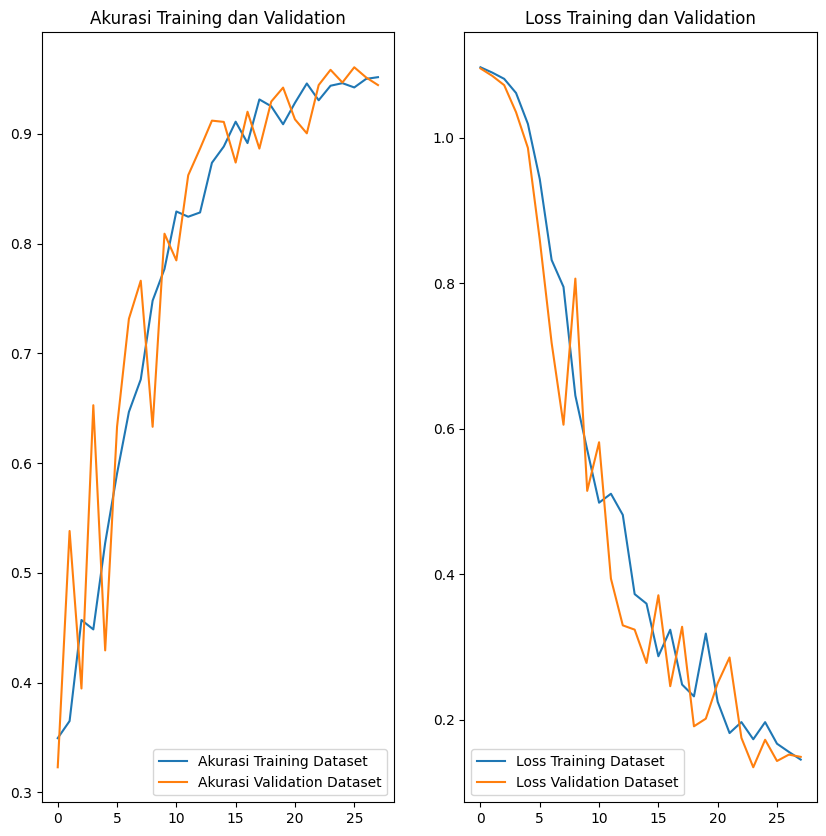

In [11]:
from matplotlib import pyplot as plt

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range,  history.history['categorical_accuracy'], label='Akurasi Training Dataset')
plt.plot(epochs_range, history.history['val_categorical_accuracy'], label='Akurasi Validation Dataset')
plt.legend(loc='lower right')
plt.title('Akurasi Training dan Validation')

plt.subplot(1, 2, 2)
plt.plot(epochs_range,  history.history['loss'], label='Loss Training Dataset')
plt.plot(epochs_range,  history.history['val_loss'], label='Loss Validation Dataset')
plt.legend(loc='lower left')
plt.title('Loss Training dan Validation')
plt.show()

### **Make Prediction**

In [12]:
from google.colab import files

def upload_images():
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())


In [13]:
uploads = upload_images()

Saving paper.png to paper (1).png


1/1 [==============================] - 0s 326ms/step
Hasil prediksi:  paper


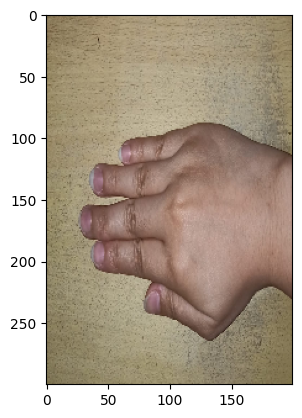

In [14]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import os
import numpy as np

fn = '/content'

for img in uploads:
  path = os.path.join(fn, img)
  img = image.load_img(path, target_size=(300,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)

  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)

  one_hot_map = {0:'paper', 1:'rock', 2:'scissors'}
  print("Hasil prediksi: ", one_hot_map[np.argmax(classes)])



The model successfuly predicted the hand image above as a paper.